<a href="https://colab.research.google.com/github/juanosalvador/Dataset-Clusters/blob/main/Iris_dataset_T%C3%A9cnicas_de_Clustering_No_Jer%C3%A1rquicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = 'https://raw.githubusercontent.com/juanosalvador/Data_sets/main/Iris.csv'

In [5]:
iris = pd.read_csv(dataset)

In [6]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
#sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
#sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
#sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
#plt.show()

In [9]:
iris.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5
SepalWidthCm,3.5,3,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


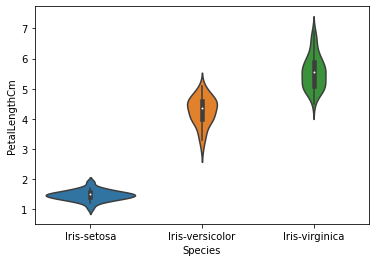

In [10]:
## ViolinPlot
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

In [11]:
X = iris.copy()
X.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5
SepalWidthCm,3.5,3,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


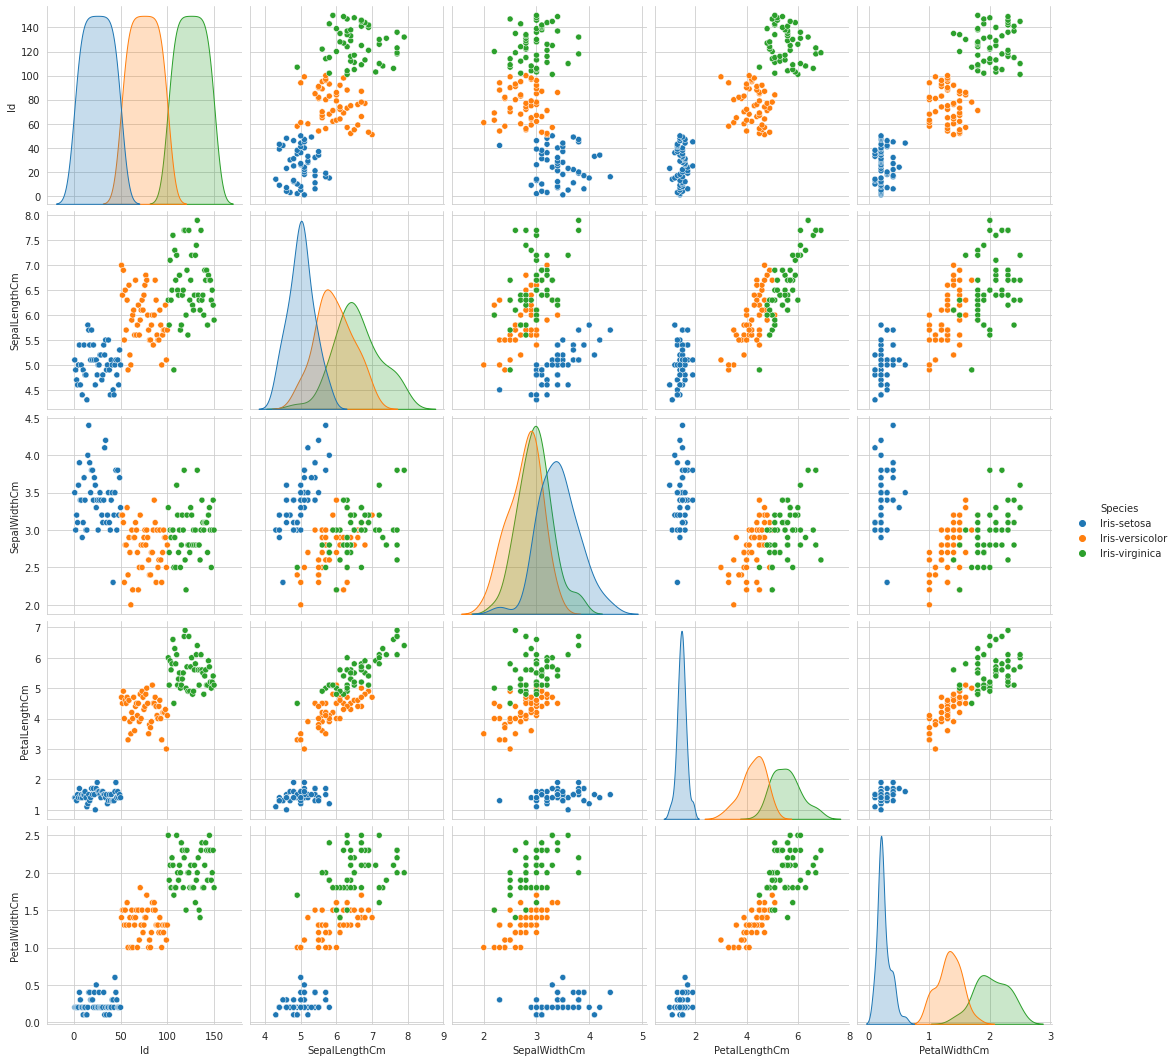

In [12]:

sns.set_style("whitegrid")
sns.pairplot(X,hue="Species",size=3);
plt.show()

In [13]:
X.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
X = iris.iloc[:,[3,4]].to_numpy()

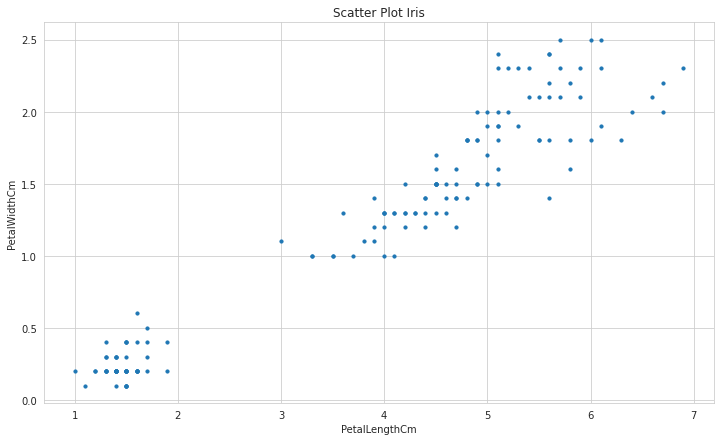

In [15]:
fig = plt.figure(figsize=(12,7))
plt.scatter(X[:,0], X[:,1], s=10)
plt.xticks()
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.title("Scatter Plot Iris")
plt.show()

# KMeans

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# Estandarizando los datos
scaler = StandardScaler().fit(X) 
X_norm = scaler.transform(X)

In [18]:
# Datos No estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans = [KMeans(n_clusters=i).fit(X) for i in numero_cluster]
#kmeans
ssw = [kmeans[i].inertia_ for i in range(len(kmeans))]
"""Encontrando K óptimo por el método de la Silueta"""
K = range(2,11)
silueta = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_, metric = 'euclidean') for k in K]


In [19]:
# Datos No estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans = [KMeans(n_clusters=i).fit(X) for i in numero_cluster]
#kmeans
ssw = [kmeans[i].inertia_ for i in range(len(kmeans))]
"""Encontrando K óptimo por el método de la Silueta"""
K = range(2,11)
silueta = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_, metric = 'euclidean') for k in K]

### Datos Estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans_norm = [KMeans(n_clusters=i).fit(X_norm) for i in numero_cluster]
#kmeans
ssw_norm = [kmeans_norm[i].inertia_ for i in range(len(kmeans_norm))]
"""Encontrando K óptimo por el método de la Silueta"""
K_est = range(2,11)
silueta_norm = [silhouette_score(X, KMeans(n_clusters=k).fit(X_norm).labels_, metric = 'euclidean') for k in K_est]


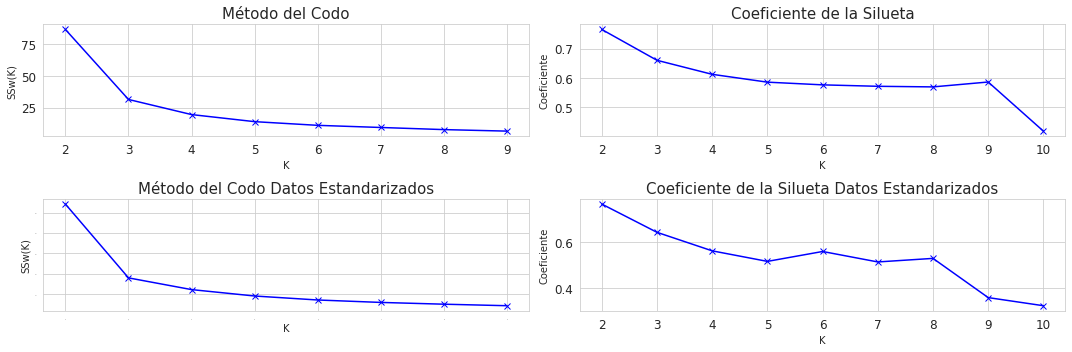

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))

# Datos No Estandarizados
axes[0,0].plot(numero_cluster, ssw,'bx-')
axes[0,0].set_title('Método del Codo', fontsize=15)
axes[0,0].set_ylabel('SSw(K)')
axes[0,0].set_xlabel('K')
axes[0,0].tick_params(axis='both', labelsize=12)

axes[0,1].plot(K,silueta, 'bx-')
axes[0,1].set_title('Coeficiente de la Silueta', fontsize=15)
axes[0,1].set_ylabel('Coeficiente')
axes[0,1].set_xlabel('K')
axes[0,1].tick_params(axis='both', labelsize=12)
## Datos no estandarizados
axes[1,0].plot(numero_cluster, ssw_norm,'bx-')
axes[1,0].set_title('Método del Codo Datos Estandarizados', fontsize=15)
axes[1,0].set_ylabel('SSw(K)')
axes[1,0].set_xlabel('K')
axes[1,0].tick_params(axis='both', labelsize=1)

axes[1,1].plot(K_est,silueta_norm, 'bx-')
axes[1,1].set_title('Coeficiente de la Silueta Datos Estandarizados', fontsize=15)
axes[1,1].set_ylabel('Coeficiente')
axes[1,1].set_xlabel('K')
axes[1,1].tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

In [21]:
# Ejecutamos el Algoritmo para 3 cluster
n_clusters = 3
k = range(1,3)
kmeans = KMeans(n_clusters=n_clusters).fit(X)
centroids = kmeans.cluster_centers_
#print(centroids)

In [22]:
#color_palette = [plt.cm.spectral(float(i)/n_clusters) for i in k]
#colors = np.array([0, 1, 2])
#kmeans.labels_

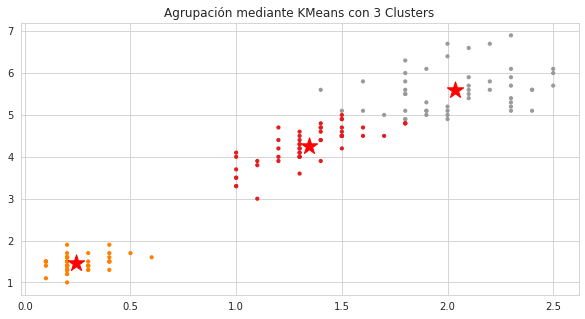

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,1], X[:,0], s=10, c = kmeans.labels_, cmap='Set1') #tab10
plt.scatter(centroids[:,1], centroids[:,0], marker = "*", c = 'red', s = 300)
#plt.title('Agrupación mediante KMeans con %d' % n_clusters, ' clusters')
plt.title('Agrupación mediante KMeans con {} Clusters'.format(n_clusters))
plt.show()

#<center><h1> Fuzzy cmeans </center><h1>

In [24]:
!pip install fuzzy-c-means

In [25]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [39]:
# Fitting the fuzzy cmeans
fcm = FCM(n_clusters=3)
fcm.fit(X)

In [41]:
fcm.centers

DeviceArray([[ 2.1060193,  2.0892565],
             [-1.1978893, -1.4107676],
             [-2.4297173, -2.3300693]], dtype=float32)

In [ ]:
# Datos No estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
fcm = [FCM(n_clusters=i).fit(X) for i in numero_cluster]
#kmeans
ssw = [kmeans[i].inertia_ for i in range(len(kmeans))]
"""Encontrando K óptimo por el método de la Silueta"""
K = range(2,11)
silueta = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_, metric = 'euclidean') for k in K]

### Datos Estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans_norm = [KMeans(n_clusters=i).fit(X_norm) for i in numero_cluster]
#kmeans
ssw_norm = [kmeans_norm[i].inertia_ for i in range(len(kmeans_norm))]
"""Encontrando K óptimo por el método de la Silueta"""
K_est = range(2,11)
silueta_norm = [silhouette_score(X, KMeans(n_clusters=k).fit(X_norm).labels_, metric = 'euclidean') for k in K_est]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,1], X[:,0], s=10, c = kmeans.labels_, cmap='Set1') #tab10
plt.scatter(centroids[:,1], centroids[:,0], marker = "*", c = 'red', s = 300)

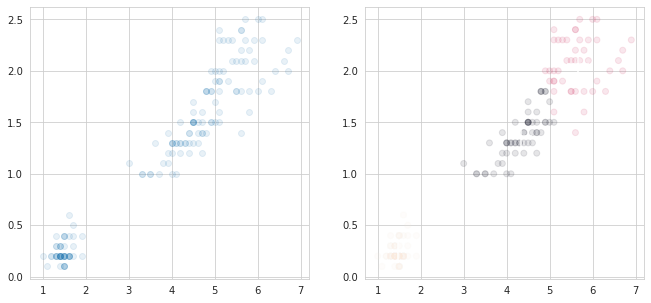

In [31]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [ ]:
# Datos No estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
fuzzy = [FCM(n_clusters=i).fit(X) for i in numero_cluster]
#FUZZY
ssw = [kmeans[i].inertia_ for i in range(len(kmeans))]
"""Encontrando K óptimo por el método de la Silueta"""
K = range(2,11)
silueta = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_, metric = 'euclidean') for k in K]

### Datos Estandarizados
"""Encontrando k óptimo por el método del codo"""
numero_cluster = range(2, 10)
kmeans_norm = [KMeans(n_clusters=i).fit(X_norm) for i in numero_cluster]
#kmeans
ssw_norm = [kmeans_norm[i].inertia_ for i in range(len(kmeans_norm))]
"""Encontrando K óptimo por el método de la Silueta"""
K_est = range(2,11)
silueta_norm = [silhouette_score(X, KMeans(n_clusters=k).fit(X_norm).labels_, metric = 'euclidean') for k in K_est]


In [32]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

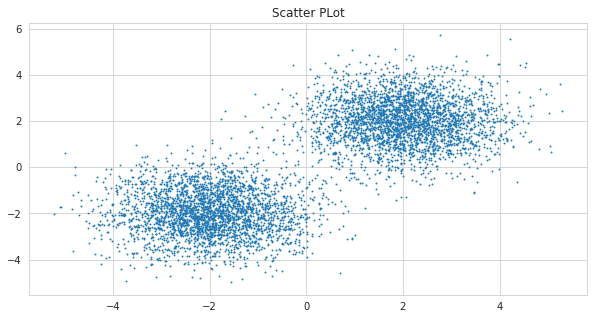

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X[:,1], X[:,0], s=0.8) #tab10
#plt.title('Agrupación mediante KMeans con %d' % n_clusters, ' clusters')
plt.title('Scatter PLot')
plt.show()

In [37]:
fcm = FCM(n_clusters=4)
fcm.fit(X)

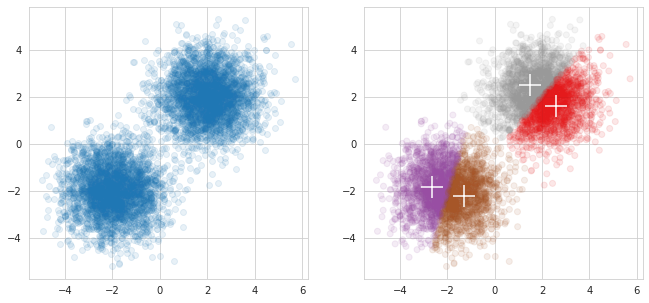

In [38]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1, cmap='Set1')
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()